# Digit classification

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns

/home/ygifoom/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# load datasets
digits = load_digits()

# what is the shape? they are greyscale!
print(digits.images.shape)

(1797, 8, 8)


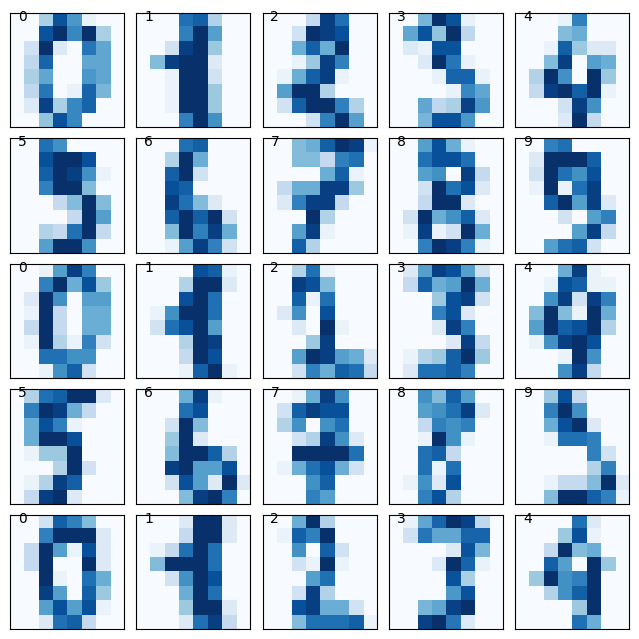

In [13]:
fig, axes = plt.subplots(5,5, figsize=(8,8), subplot_kw={"xticks":[], "yticks":[]},gridspec_kw = {"hspace" : 0.1, "wspace" : 0.1})

# plot numbers
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = "Blues") #binary
    ax.text(.05, .05, str(digits.target[i]))

0.8754171301446051


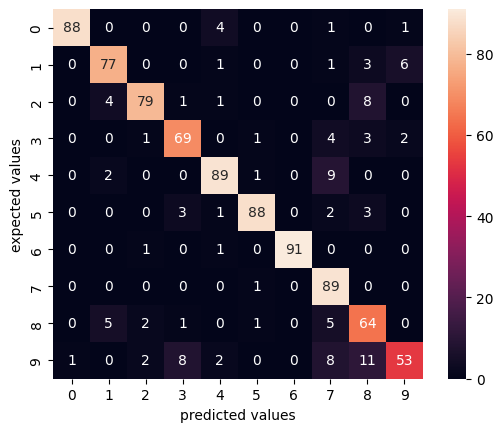

In [4]:
# get data
X = digits.data
y = digits.target

# split data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=123, train_size=0.5)

# create an instance of the model 
model = GaussianNB()

# train the model 
model.fit(Xtrain, ytrain)

# test accuracy
ypred = model.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
print(accuracy)

# other metrics for the model
# confusion matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat, square=True, annot = True, cbar = True, cmap="rocket")

plt.xlabel("predicted values")
plt.ylabel("expected values")
plt.show()

# How to properly train you model
Mainly tuning hyper parameters:

- __epoch__: in this contest it is the number of times the model has gone through the dataset from top to bottom. 

- __Batch size__: how many samples of the dataset do we want to analyse while training a model. This is a way to split a dataset in managable c'hunks.

- __Validation (test) dataset__: used to validate the performane of the net so that training can be halted if it is going to shit.

- __Cross validation__: training the model on the whole dataset by training on smaller chunks one at a time and testing on the rest of the dataset. In such a way you are actually training on the whole dataset, ensuring that problematic datapoints are used for training and not lost to the validation set. Accuracy scores can be the avereges of all the trains (see also leave one out classification)

- __over ad underfitting__: reaching 100% accuracy in few epochs, especially reaching it esponencially, can be a sign of overfitting, a nice accuracy against epoch graph should be linear. The final test is a huge drop in training accuracy and validation accuracy

# But how to pick the best model for a task?



In [7]:
# qualitative data has to be made into numerical
data = [
    {"price" : 239234, "rooms" : 4, "neighborhood": "Tiburtina"},
    {"price" : 2130213, "rooms" : 8, "neighborhood": "Trieste"},
    {"price" : 500, "rooms" : 2, "neighborhood": "Casalotti"},
    {"price" : 650, "rooms" : 2, "neighborhood": "Furio Camillo"},
]

# this approach is a bad representation,
# the model may infer inexistent qualities about the categorical classes
{"Trieste" : 1, "Tiburtina": 2, "Casalotti": 3, "Furio Camillo": 4}

# one hot encoding is the way to go
# like so:
{"Trieste" : "0001", "Tiburtina": "0010", "Casalotti": "0100", "Furio Camillo": "1000"}

# using sklearn implementation
# check out optimal sparse representation
vec = DictVectorizer(sparse=False, dtype=int)
result = vec.fit_transform(data)

# the one hot encoding adds a column for every possible value in the categorical variable
print(result)

# here is the mapping to go back
print(vec.get_feature_names_out())



[[      0       0       1       0  239234       4]
 [      0       0       0       1 2130213       8]
 [      1       0       0       0     500       2]
 [      0       1       0       0     650       2]]
['neighborhood=Casalotti' 'neighborhood=Furio Camillo'
 'neighborhood=Tiburtina' 'neighborhood=Trieste' 'price' 'rooms']
